# Cvičenie č. 2

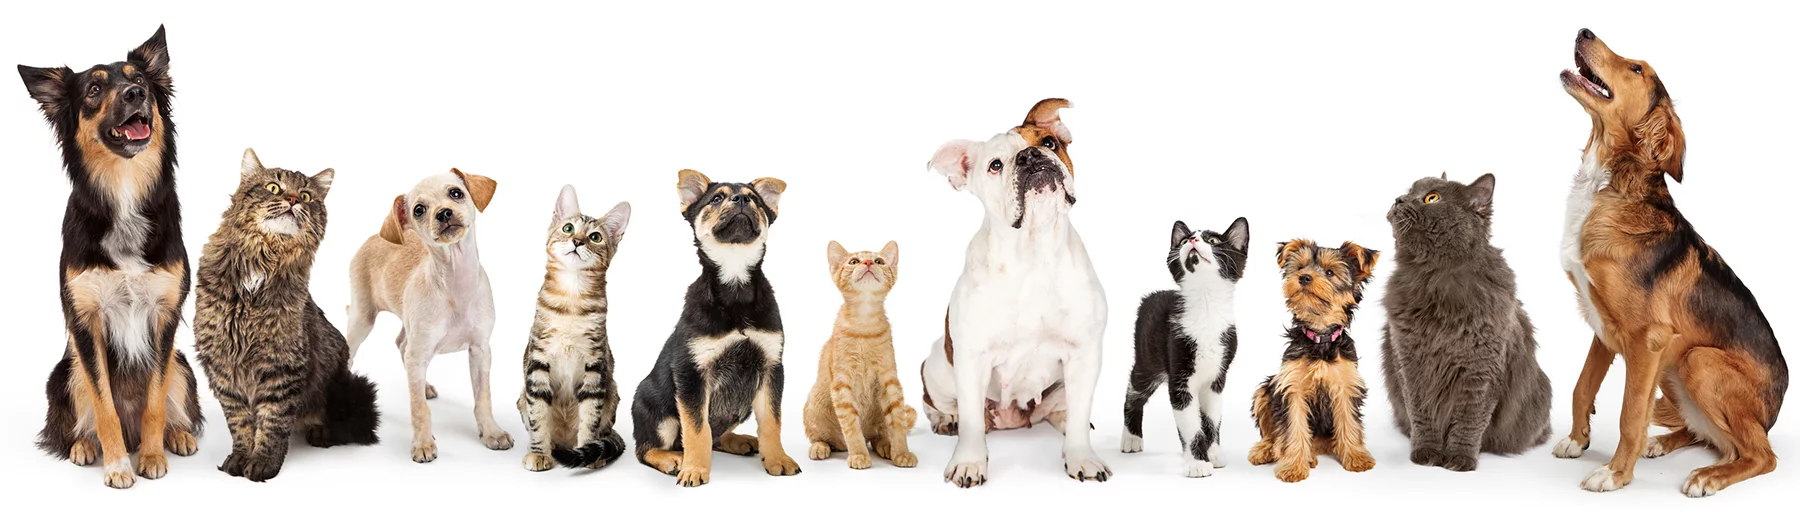

Počas semestra budete na cvičeniach vypracovávať úlohy, ktoré vám pomôžu pri riešení zadaní. Na všetkých cvičeniach budete pracovať s tou istou dátovou sadou (v zadaniach dostanete iné). Jedná sa o dátovú množinu obsahujúcu informácie z portálu petfinder.my, ktorý sa venuje adopcii zvieratiek.

Pri vypracovaní úloh z cvičenia môžete použit vlastný editor, alebo si vytvorte kópiu tohto notebook-u na svojom Google Drive a editujte ho tam.

K dispozícii budete mať dve dátové sady, trénovaciu a testovaciu. Oba sa nachádzajú na nasledovnej linke: [DATA](https://drive.google.com/drive/folders/1rCTyu6CbEXx3Gl9r37fXMywL36WqBb5U?usp=sharing).

Ak budete pracovať vo vlastnom editore:


1.   stiahnite si súbory z vyššie uvedenej linky,
2.   načítajte ich priamo z lokálneho úložiska.

Ak budete pracovať v Colab-e:


1.   vytvorte si kópiu tohto notebook-u na svojom Google Drive,
2.   stiahnite si súbory z vyššie uvedenej linky a nahrajte ich na svoj Google Drive (ideálne do nejakého priečinka, môžete si sem ukladať aj kópie notebook-ov z ostatných cvičení),
3. spustite nasledovný príkaz (umožníte ním prístup k vášmu Google Drive pre tento notebook):


```
from google.colab import drive
drive.mount('/content/drive')
```
4. nastavte si premennú smerujúcu k nahratým súborom, napr. v mojom prípade:


```
data_path = '/content/drive/MyDrive/SUNS-2022/data/'
```
5. ďalej v kóde môžete používať cestu:


```
train_data_path = data_path + 'train_data.csv'
test_data_path = data_path + 'test_data.csv'
```

Linky na knižnice, ktoré vám môžu uľahčiť prácu pri vypracovávaní úloh:


*   [Pandas](https://pandas.pydata.org/docs/)
*   [NumPy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)
*   [Plotly](https://plotly.com/python/)
* [Seaborn](https://seaborn.pydata.org/)
* [Yellowbrick](https://www.scikit-yb.org/en/latest/)
*   [Scikit-learn](https://scikit-learn.org/stable/)
*   [Keras](https://keras.io/)
*   [Tensorflow](https://www.tensorflow.org/?gclid=EAIaIQobChMI7v35kq-0-gIVToODBx22BQiaEAAYASAAEgL70fD_BwE)

Ak budete používať Colab, väčšinu bežne používaných knižníc nemusíte inštalovať, stačí ich importnúť v kóde. Pri použití vlastného editora odporúčame vytvoriť virtual environment do ktorého si nainštalujete potrebné knižnice.

In [2]:
import numpy as np
import pandas

data_path = '/Users/adam.samko/Documents/SUNS/cvicenia/cv2/data/'

train_data_path = data_path + 'train_data.csv'
test_data_path = data_path + 'test_data.csv'

parsed_train_data = pandas.read_csv(train_data_path)
parsed_test_data = pandas.read_csv(test_data_path)

trained_df = pandas.DataFrame(parsed_train_data)
test_df = pandas.DataFrame(parsed_test_data)
trained_df.info

<bound method DataFrame.info of       Species        Name  Age (months)  Gender MaturitySize FurLength  \
0         Dog     Patches          11.0  Female       Medium     Short   
1         Dog   Lala Girl           3.0  Female       Medium    Medium   
2         Dog   Keen Keen           1.0  Female       Medium     Short   
3         Dog       Yorky           4.0    Male        Small      Long   
4         Dog        Ocha           5.0  Female       Medium     Short   
...       ...         ...           ...     ...          ...       ...   
11989     Cat  The Kiddos           1.0   Mixed       Medium    Medium   
11990     Cat  Kaya Bread           2.0  Female       Medium     Short   
11991     Cat    Siam Boy           1.0    Male        Large    Medium   
11992     Dog        Gaby           2.0  Female       Medium     Short   
11993     Dog      Bailey           5.0  Female       Medium     Short   

      Vaccinated  Dewormed Sterilized   Health  ...      PetID  PhotoAmt  \
0  

In [3]:
trained_df.shape

(11994, 25)

1. Načítajte dáta a vypíšte prvých pár riadkov. Vypíšte rozmer tabuľlky (počet riadkov a stĺpcov).
Linky:


*   [Načítanie súboru](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


*   [Výpis riadkov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)



In [9]:
trained_df.columns
len(trained_df.index)
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994 entries, 0 to 11993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Species                 11994 non-null  object 
 1   Name                    10961 non-null  object 
 2   Age (months)            11994 non-null  float64
 3   Gender                  11994 non-null  object 
 4   MaturitySize            11994 non-null  object 
 5   FurLength               11994 non-null  object 
 6   Vaccinated              11994 non-null  object 
 7   Dewormed                11994 non-null  object 
 8   Sterilized              11994 non-null  object 
 9   Health                  11994 non-null  object 
 10  Quantity                11994 non-null  float64
 11  Fee                     11994 non-null  float64
 12  RescuerID               11994 non-null  object 
 13  VideoAmt                11994 non-null  float64
 14  Description             11985 non-null

In [5]:
trained_df.dtypes

Species                    object
Name                       object
Age (months)              float64
Gender                     object
MaturitySize               object
FurLength                  object
Vaccinated                 object
Dewormed                   object
Sterilized                 object
Health                     object
Quantity                  float64
Fee                       float64
RescuerID                  object
VideoAmt                  float64
Description                object
PetID                      object
PhotoAmt                  float64
AdoptionSpeed              object
StateName                  object
Primary Breed              object
Secondary Breed            object
Color 1                    object
Color 2                    object
Color 3                    object
AdoptionSpeed (months)      int64
dtype: object

In [6]:
test_df.dtypes

Species                    object
Name                       object
Age (months)                int64
Gender                     object
MaturitySize               object
FurLength                  object
Vaccinated                 object
Dewormed                   object
Sterilized                 object
Health                     object
Quantity                    int64
Fee                         int64
RescuerID                  object
VideoAmt                    int64
Description                object
PetID                      object
PhotoAmt                  float64
AdoptionSpeed              object
StateName                  object
Primary Breed              object
Secondary Breed            object
Color 1                    object
Color 2                    object
Color 3                    object
AdoptionSpeed (months)      int64
dtype: object

In [7]:
trained_df.dtypes == test_df.dtypes

Species                    True
Name                       True
Age (months)              False
Gender                     True
MaturitySize               True
FurLength                  True
Vaccinated                 True
Dewormed                   True
Sterilized                 True
Health                     True
Quantity                  False
Fee                       False
RescuerID                  True
VideoAmt                  False
Description                True
PetID                      True
PhotoAmt                   True
AdoptionSpeed              True
StateName                  True
Primary Breed              True
Secondary Breed            True
Color 1                    True
Color 2                    True
Color 3                    True
AdoptionSpeed (months)     True
dtype: bool

Popis jednotlivých stĺpcov tabuľky:

*   PetID - unikátne ID profilu zvieratka,
*   AdoptionSpeed - kategorická hodnota vyjadrujúca rýchlosť adopcie,
*   AdoptionSpeed (months) - číselná hodnota vyjadrujúca rýchlosť adopcie v mesiacoch,
* Type - typ zvieratka,
* Name - meno,
* Age - vek (v mesiacoch),
* Breed1 - primárna rasa,
* Breed2 - sekundárna rasa (v prípade miešancov),
* Gender - pohlavie (Mixed - zmiešané, ak profil reprezentuje skupinu zvieratiek),
* Color1 - farba 1,
* Color2 - farba 2,
* Color3 - farba 3,
* MaturitySize - veľkost v dospelosti,
* FurLength - dĺžka srsti,
* Vaccinated - vakcinácia,
* Dewormed - odčervnenie,
* Sterilized - sterilizácia,
* Health - zdravotný stav,
* Quantity - počet zvieratiek v profile,
* Fee - cena adopcie,
* State - štát v Malajzii,
* RescuerID - unikátne ID záchrancu,
* VideoAmt - počet videí,
* PhotoAmt - počet obrázkov,
* Description - popis.

2. Vypíšte počet záznamov, názov a typ stĺpcov v jednotlivých množinách. Uistite sa, že trénovacia a testovacia množina majú rovnaké názvy a typy stĺpcov. Všimnite si, že testovacia množina je menej početná ako trénovacia. Na ďalších zadaniach budete pracovať aj s validačnou množinou, zatiaľ ju nebudete potrebovať.

Linky:


*   [Názvy stĺpcov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
*   [Typy stĺpcov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)



In [8]:
trained_df.replace(np.NaN, trained_df.mean())

/var/folders/x7/h7s5789j0gg1fmnt6f2ydb2h0000gn/T/ipykernel_39952/3151217130.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  trained_df.replace(np.NaN, trained_df.mean())


,Species,Name,Age (months),Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,PetID,PhotoAmt,AdoptionSpeed,StateName,Primary Breed,Secondary Breed,Color 1,Color 2,Color 3,AdoptionSpeed (months)
0,Dog,Patches,11.0,Female,Medium,Short,No,No,No,Healthy,...,4a9fa9d9e,2.0,Adopted between 8-30 days,Selangor,Beagle,Mixed Breed,Black,Brown,White,19
1,Dog,Lala Girl,3.0,Female,Medium,Medium,No,Yes,No,Healthy,...,0243911ea,2.0,No adoption after 90 days,Kuala Lumpur,Mixed Breed,NaN,Cream,White,NaN,176
2,Dog,Keen Keen,1.0,Female,Medium,Short,Not Sure,Not Sure,No,Healthy,...,5b73a7ea8,1.0,Adopted between 31-90 days,Selangor,Labrador Retriever,Mixed Breed,Brown,NaN,NaN,57
3,Dog,Yorky,4.0,Male,Small,Long,Yes,Yes,No,Healthy,...,c8f5f9120,1.0,Adopted between 1-7 days,Selangor,Yorkshire Terrier Yorkie,NaN,Black,Brown,Golden,2
4,Dog,Ocha,5.0,Female,Medium,Short,Yes,Yes,Yes,Healthy,...,a6c836abe,4.0,Adopted between 31-90 days,Selangor,Mixed Breed,NaN,Golden,Cream,NaN,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,Cat,The Kiddos,1.0,Mixed,Medium,Medium,No,No,No,Healthy,...,f792e0ff5,7.0,Adopted between 8-30 days,Kuala Lumpur,Domestic Medium Hair,NaN,Black,Cream,White,15
11990,Cat,Kaya Bread,2.0,Female,Medium,Short,No,Yes,Yes,Healthy,...,57f322839,6.0,Adopted between 31-90 days,Selangor,Domestic Short Hair,NaN,Golden,NaN,NaN,52
11991,Cat,Siam Boy,1.0,Male,Large,Medium,Not Sure,Not Sure,Not Sure,Healthy,...,0e47fe631,8.0,Adopted between 31-90 days,Pulau Pinang,Siamese,NaN,Brown,Gray,NaN,52
11992,Dog,Gaby,2.0,Female,Medium,Short,No,Yes,No,Healthy,...,24afd5f54,1.0,Adopted between 8-30 days,Selangor,Spitz,Mixed Breed,Brown,NaN,NaN,10


3. Zistite, či množiny neobsahujú neobvyklé hodnoty. Ak áno, odstráňte ich (nie však z testovacej množiny). *Pri mazaní záznamov vždy najskôr zvážte, či takýmto úkonom neprídete o priveľké množstvo dát.*

Pri hľadaní neobvyklých hodnôt sledujte výskyt:

*   nezmyselných hodnôt (napr. pri stĺpci s označením druhu ovocia nedáva zmysel hodnota "auto"),
*   hodnôt mimo rozsah (napr. ak stĺpec obsahuje výšku dospelej osoby v metroch, hodnota -1.5 alebo 20 nedávajú zmysel),
* výskyt hodnôt v rozsahu s príliš malým množstvom záznamov (napr. ak chceme rozlišovať druh oblečenia a spomedzi 5000 záznamov máme len 3 záznamy s označením "rolák", alebo ak sledujeme množstvo vypitej kávy študentmi slovenských vysokých škôl a máme len 2 čo nepijú kávu vôbec a jedného, ktorý vypije 15 káv denne).

V poslednom zo spomenutých prípadov sa zamyslite, či nie je vhodné určité kategórie zlúčiť a získať tak početnejšiu kategóriu.

Pomôžte si grafom (napr. histogram, boxplot, koláčový graf, stĺpcový graf) - zvoľte ho vhodne podľa typu stĺpca.

Linky (pre Matplotlib, môžete použiť akúkoľvek inú knižnicu z vyššie uvedených alebo podľa vlastného výberu):


*   [Matplotlib - histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
*   [Matplotlib - boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
*   [Matplotlib - pie plot](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)
*   [Matplotlib - bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)



4. Zistite počet chýbajúcich záznamov v jednotlivých stĺpoch tabuľky pre obe množiny.
Linky:


*   [Počet chýbajúcich záznamov](https://datatofish.com/count-nan-pandas-dataframe/)



5. Záznamy s chýbajúcimi hodnotami odstráňte, alebo nahraďte priemerom pre daný atribút/stĺpec - v prípade testovacej množiny záznamy neodstraňujte, môžete ich iba nahradiť. Priemerné hodnoty počítajte **VŽDY** len z trénovacej množiny, tieto následne použite pre obe množiny.

*Pri mazaní záznamov vždy najskôr zvážte, či takýmto úkonom neprídete o priveľké množstvo dát - ak v niektorom zo stĺpcov chýba napr. 80% hodnôt, je rozumnejšie tento stĺpec ďalej nepoužiť a ponechať si všetky záznamy.*

Linky:

*   [Pandas - práca s chýbajúcimi hodnotami](https://pandas.pydata.org/docs/user_guide/missing_data.html)
* [Nahradenie hodnôt pomocou knižnice](https://scikit-learn.org/stable/modules/impute.html)


6. Vyberte si 2 číselné stĺpce a zobrazte histogramy ich hodnôt pre obe množiny. Vypíšte:
*   priemernú hodnotu,
*   odchýlku,
* minimálnu a maximálnu hodnotu.

Linky:


*   [Pandas - histogram](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)



7. Normalizujte alebo škálujte dáta. Dodržte pritom nasledovné:
*   ak budete normalizovať dáta pomocou vlastného výpočtu - vypočítajte priemer a odchýlku, prípadne minimálnu a maximálnu hodnotu pre každý stĺpec samostatne z **TRÉNOVACEJ MNOŽINY**, tieto následne použite pri transformácii hodnôt pre obe množiny,
*   ak budete používať metódy nejakej knižnice, na nastavenie parametrov využite **TRÉNOVACIU MNOŽINU**, následne ich použite pre transformovanie dát v oboch množinách,
* normalizáciu vykonajte len pre číselné stĺpce.

*Uistite sa, že ste zachovali názvy stĺpcov aj po týchto úpravách. Pri použití knižnice sa môže stať, že o ne prídete.*

Linky:


*   [MinMax normalizácia](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
*   [Štandardizácia](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



8. Pre vybrané stĺpce z bodu č. 6 znova zobrazte histogramy a vypíšte vyššie spomenuté hodnoty.

9. Pre kategorické hodnoty využite vhodný spôsob kódovania:


*   hodnoty, ktoré reprezentujú postupnosť môžeme kódovať číslami 1-N alebo 0-N (N je počet kategórií), napr. malý, veľký, stredný => 0, 1, 2 alebo 1, 2, 3,
*   hodnoty, ktoré nereprezentujú postupnosť kódujeme iným spôsobom, napr. biela, čierna, zelená (napr. one-hot encoding).

*Pamätajte, že pri kódovaní platí rovnaké pravidlo ako pri normalizácii číselných dát. Nastavenie kódovania vykonajte na **TRÉNOVACEJ MNOŽINE** a následne aplikujte pre obe množiny.*

*Uistite sa, že ste zachovali názvy stĺpcov aj po týchto úpravách. Pri použití knižnice sa môže stať, že o ne prídete.*

Linky:


*   [Label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
*   [One-hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)



10. Uložte si všetko potrebné pre ďalšiu prácu s dátami na ostatných cvičeniach:


*   pripravenú trénovaciu množinu,
*   pripravenú testovaciu množinu,
* nastavenie normalizácie/škálovania (prípadne nastavené modely knižnice),
* nastavenie kódodovania (prípadne nastavené modely knižnice).

Linky:


*   [Uloženie dát do csv súboru](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

